In [53]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.2f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [54]:
df=pd.read_csv(r"C:\Users\User\Desktop\New York\listings_NY.csv")
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211102175544,2021-11-03,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,35%,18%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.00,8.00,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75,-73.99,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.00,"[""Bathtub"", ""Dedicated workspace"", ""Hair dryer...",$150.00,30,1125,30.00,30.00,1125.00,1125.00,30.00,1125.00,NaN,t,0,17,47,322,2021-11-03,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211102175544,2021-11-03,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,21%,76%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.00,1.00,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68,-73.96,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.00,3.00,"[""Microwave"", ""Oven"", ""Pack \u2019n play/Trave...",$73.00,1,730,1.00,1.00,730.00,730.00,1.00,730.00,NaN,t,4,10,33,220,2021-11-03,408,38,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,4.91


In [55]:
df.shape

(37713, 74)

In [56]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [57]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

In [58]:
(df.isnull().sum()/df.shape[0])*100

id                                               0.00
listing_url                                      0.00
scrape_id                                        0.00
last_scraped                                     0.00
name                                             0.03
description                                      3.19
neighborhood_overview                           40.32
picture_url                                      0.00
host_id                                          0.00
host_url                                         0.00
host_name                                        0.08
host_since                                       0.08
host_location                                    0.36
host_about                                      41.82
host_response_time                              45.23
host_response_rate                              45.23
host_acceptance_rate                            43.36
host_is_superhost                                0.08
host_thumbnail_url          

In [59]:
(df.isnull().sum()/len(df))*100

id                                               0.00
listing_url                                      0.00
scrape_id                                        0.00
last_scraped                                     0.00
name                                             0.03
description                                      3.19
neighborhood_overview                           40.32
picture_url                                      0.00
host_id                                          0.00
host_url                                         0.00
host_name                                        0.08
host_since                                       0.08
host_location                                    0.36
host_about                                      41.82
host_response_time                              45.23
host_response_rate                              45.23
host_acceptance_rate                            43.36
host_is_superhost                                0.08
host_thumbnail_url          

In [60]:
df_copy=df.copy()

In [61]:
## Remove special symbol from Price column and convert to numeric dtype

df_copy['price']=df_copy['price'].str.replace('$','').str.replace(',','')
df_copy['price']=df_copy['price'].astype(float)

In [62]:
df_copy.rename(columns = {'host_response_rate':'host_response_rate(in %)','host_acceptance_rate':'host_acceptance_rate(in %)'},
               inplace = True)

In [63]:
## Remove special symbol from host response rate & host acceptance rate column and convert to numeric dtype

df_copy['host_response_rate(in %)']=df_copy['host_response_rate(in %)'].str.replace('%','').str.replace(',','')
df_copy['host_response_rate(in %)']=df_copy['host_response_rate(in %)'].astype(float)

df_copy['host_acceptance_rate(in %)']=df_copy['host_acceptance_rate(in %)'].str.replace('%','').str.replace(',','')
df_copy['host_acceptance_rate(in %)']=df_copy['host_acceptance_rate(in %)'].astype(float)

In [64]:
df_copy['host_response_rate(in %)']=df_copy['host_response_rate(in %)']/100
df_copy['host_acceptance_rate(in %)']=df_copy['host_acceptance_rate(in %)']/100

In [65]:
## Shifting the Price column to last position

first_col=df_copy.pop('price')
df_copy.insert(loc=len(df_copy.columns),column='price',value=first_col)

In [66]:
## Droping columns with 100% nulL values


df_copy=df_copy.drop(['calendar_updated','bathrooms','license'],axis=1)

In [67]:
(df_copy.isnull().sum()/len(df_copy))*100

id                                              0.00
listing_url                                     0.00
scrape_id                                       0.00
last_scraped                                    0.00
name                                            0.03
description                                     3.19
neighborhood_overview                          40.32
picture_url                                     0.00
host_id                                         0.00
host_url                                        0.00
host_name                                       0.08
host_since                                      0.08
host_location                                   0.36
host_about                                     41.82
host_response_time                             45.23
host_response_rate(in %)                       45.23
host_acceptance_rate(in %)                     43.36
host_is_superhost                               0.08
host_thumbnail_url                            

In [68]:
(df_copy.select_dtypes(include='object')).nunique()

listing_url                     37713
last_scraped                        3
name                            36458
description                     33851
neighborhood_overview           18644
picture_url                     36588
host_url                        25912
host_name                        9101
host_since                       4254
host_location                    1731
host_about                      14497
host_response_time                  4
host_is_superhost                   2
host_thumbnail_url              25706
host_picture_url                25706
host_neighbourhood                478
host_verifications                529
host_has_profile_pic                2
host_identity_verified              2
neighbourhood                     208
neighbourhood_cleansed            222
neighbourhood_group_cleansed        5
property_type                      79
room_type                           4
bathrooms_text                     30
amenities                       31776
has_availabi

In [69]:
## Removing irrelevant 'OBJECT' datatypes


df_copy=df_copy.drop(['listing_url','last_scraped','name','description','neighborhood_overview','picture_url',
                      'host_url','host_name','host_since','host_location','host_about','host_thumbnail_url',
                      'host_picture_url','host_verifications','host_has_profile_pic','host_identity_verified',
                      'calendar_last_scraped','first_review','last_review'],axis=1)

In [70]:
(df_copy.select_dtypes(exclude='object')).nunique()

id                                              37713
scrape_id                                           1
host_id                                         25912
host_response_rate(in %)                           84
host_acceptance_rate(in %)                        101
host_listings_count                                89
host_total_listings_count                          89
latitude                                        17583
longitude                                       14334
accommodates                                       17
bedrooms                                           13
beds                                               20
minimum_nights                                    126
maximum_nights                                    274
minimum_minimum_nights                            126
maximum_minimum_nights                            128
minimum_maximum_nights                            238
maximum_maximum_nights                            238
minimum_nights_avg_ntm      

In [71]:
## Removing irrrelevant 'NUMERIC' columns

df_copy=df_copy.drop(['id','scrape_id','host_id'],axis=1)

In [72]:
df_copy.shape

(37713, 49)

In [73]:
na= (df_copy.isnull().sum()/len(df_copy))*100
na[na!=0]

host_response_time            45.23
host_response_rate(in %)      45.23
host_acceptance_rate(in %)    43.36
host_is_superhost              0.08
host_neighbourhood            19.54
host_listings_count            0.08
host_total_listings_count      0.08
neighbourhood                 40.32
bathrooms_text                 0.29
bedrooms                      10.50
beds                           5.96
minimum_minimum_nights         0.05
maximum_minimum_nights         0.05
minimum_maximum_nights         0.05
maximum_maximum_nights         0.05
minimum_nights_avg_ntm         0.05
maximum_nights_avg_ntm         0.05
review_scores_rating          24.43
review_scores_accuracy        26.08
review_scores_cleanliness     26.05
review_scores_checkin         26.09
review_scores_communication   26.07
review_scores_location        26.11
review_scores_value           26.11
reviews_per_month             24.43
dtype: float64

In [74]:
df_copy.nunique()

host_response_time                                  4
host_response_rate(in %)                           84
host_acceptance_rate(in %)                        101
host_is_superhost                                   2
host_neighbourhood                                478
host_listings_count                                89
host_total_listings_count                          89
neighbourhood                                     208
neighbourhood_cleansed                            222
neighbourhood_group_cleansed                        5
latitude                                        17583
longitude                                       14334
property_type                                      79
room_type                                           4
accommodates                                       17
bathrooms_text                                     30
bedrooms                                           13
beds                                               20
amenities                   

In [75]:
df_copy.to_csv(r"C:\Users\User\Desktop\New York\NY1_clean.csv",index=False)

In [76]:
df_copy.dtypes

host_response_time                               object
host_response_rate(in %)                        float64
host_acceptance_rate(in %)                      float64
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
neighbourhood                                    object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            

## objects

In [77]:
# host_response_time            45.23
# host_is_superhost              0.08
# host_neighbourhood            19.54
# neighbourhood                 40.32
# bathrooms_text                 0.29

## Numeric

In [78]:
# host_response_rate(in %)      45.23
# host_acceptance_rate(in %)    43.36
# host_listings_count            0.08
# host_total_listings_count      0.08
# bedrooms                      10.50
# beds                           5.96
# minimum_minimum_nights         0.05
# maximum_minimum_nights         0.05
# minimum_maximum_nights         0.05
# maximum_maximum_nights         0.05
# minimum_nights_avg_ntm         0.05
# maximum_nights_avg_ntm         0.05
# review_scores_rating          24.43
# review_scores_accuracy        26.08
# review_scores_cleanliness     26.05
# review_scores_checkin         26.09
# review_scores_communication   26.07
# review_scores_location        26.11
# review_scores_value           26.11
# reviews_per_month             24.43

## Missing Value treatment

In [79]:
df_dummy=df_copy.copy()

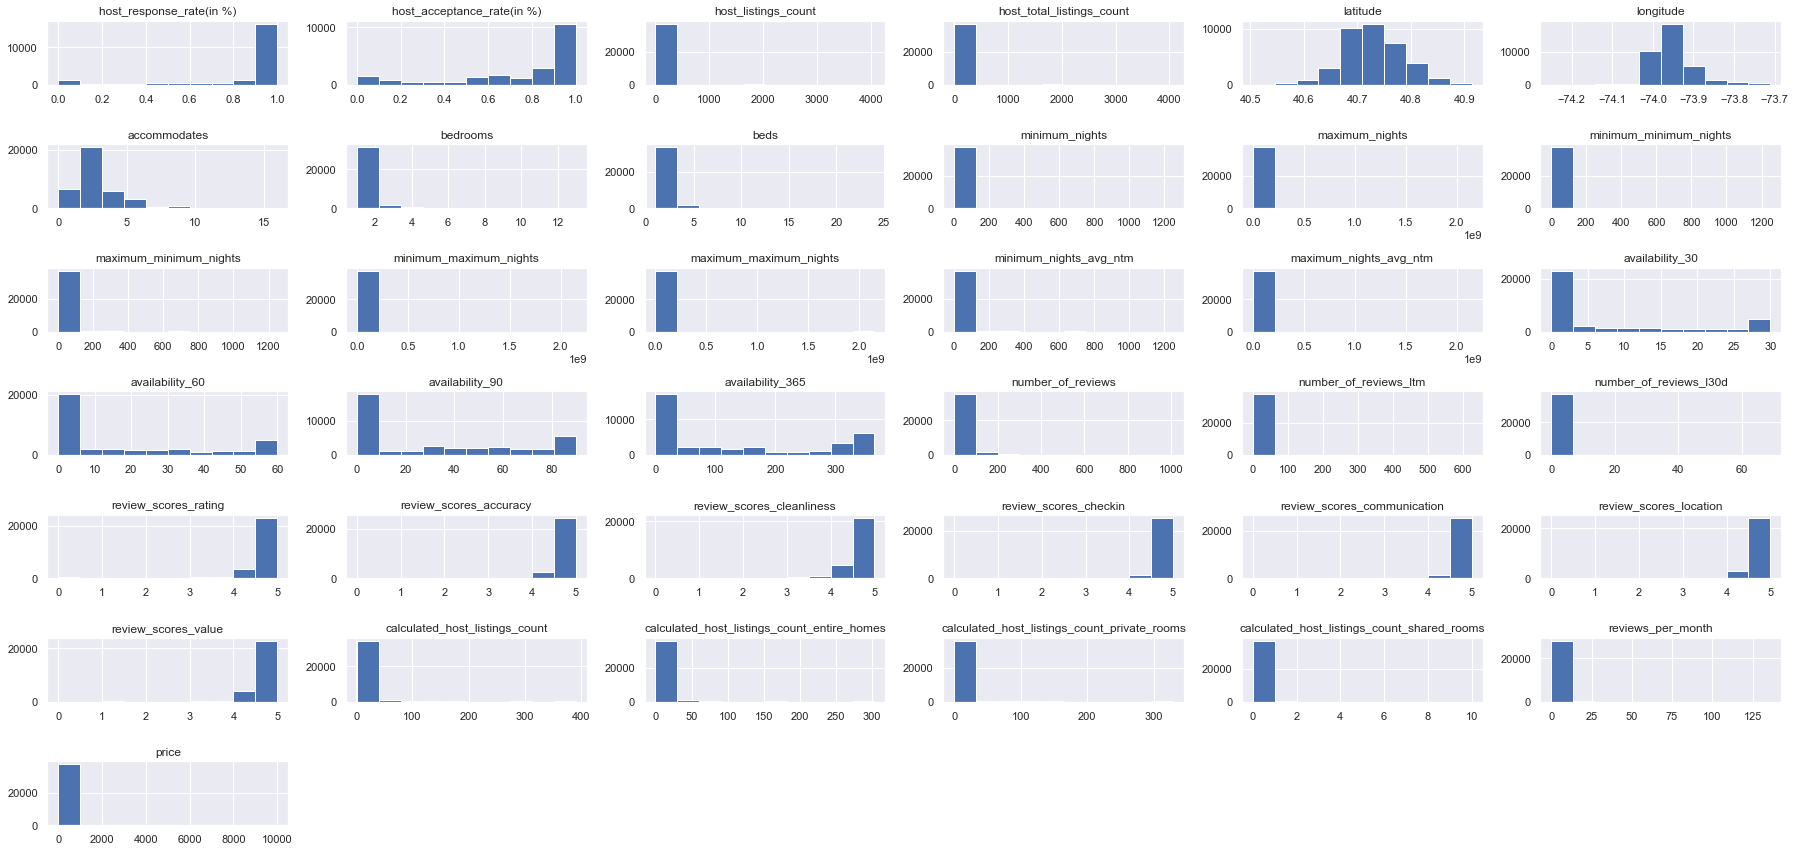

In [80]:
sns. set(font_scale=1) 
df_copy.select_dtypes(exclude=['object']).hist(figsize = (25,12))
plt.tight_layout()
plt.show()

In [81]:
# host_response_rate(in %)      45.23
# host_acceptance_rate(in %)    43.36
# host_listings_count            0.08
# host_total_listings_count      0.08
# bedrooms                      10.50
# beds                           5.96
# minimum_minimum_nights         0.05
# maximum_minimum_nights         0.05
# minimum_maximum_nights         0.05
# maximum_maximum_nights         0.05
# minimum_nights_avg_ntm         0.05
# maximum_nights_avg_ntm         0.05
# review_scores_rating          24.43
# review_scores_accuracy        26.08
# review_scores_cleanliness     26.05
# review_scores_checkin         26.09
# review_scores_communication   26.07
# review_scores_location        26.11
# review_scores_value           26.11
# reviews_per_month             24.43

In [82]:
df_dummy.dropna(subset=['host_listings_count','host_total_listings_count','minimum_minimum_nights',
                       'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                       'maximum_nights_avg_ntm'],inplace=True)

In [83]:
df_dummy.fillna(df_dummy['host_response_rate(in %)'].median(),inplace=True)
df_dummy.fillna(df_dummy['host_acceptance_rate(in %)'].median(),inplace=True)
df_dummy.fillna(df_dummy['bedrooms'].median(),inplace=True)
df_dummy.fillna(df_dummy['beds'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_rating'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_accuracy'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_cleanliness'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_checkin'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_communication'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_location'].median(),inplace=True)
df_dummy.fillna(df_dummy['review_scores_value'].median(),inplace=True)
df_dummy.fillna(df_dummy['reviews_per_month'].median(),inplace=True)

In [84]:
(df_dummy.isnull().sum()/len(df_dummy))*100

host_response_time                             0.00
host_response_rate(in %)                       0.00
host_acceptance_rate(in %)                     0.00
host_is_superhost                              0.00
host_neighbourhood                             0.00
host_listings_count                            0.00
host_total_listings_count                      0.00
neighbourhood                                  0.00
neighbourhood_cleansed                         0.00
neighbourhood_group_cleansed                   0.00
latitude                                       0.00
longitude                                      0.00
property_type                                  0.00
room_type                                      0.00
accommodates                                   0.00
bathrooms_text                                 0.00
bedrooms                                       0.00
beds                                           0.00
amenities                                      0.00
minimum_nigh

In [85]:
df_dummy.shape

(37663, 49)

# EDA

In [86]:
# Finding the correlation of target variable 'Price' with other numeric variables

df_copy_corr=df_dummy[df_dummy.columns].corr()['price'][:-1]
df_copy_corr.sort_values(ascending=False)


## Bedrooms,accomodates and beds are having significant correlation with price

accommodates                                    0.31
bedrooms                                        0.25
beds                                            0.23
availability_30                                 0.12
availability_60                                 0.10
availability_90                                 0.10
availability_365                                0.08
host_total_listings_count                       0.07
host_listings_count                             0.07
calculated_host_listings_count_entire_homes     0.06
maximum_minimum_nights                          0.05
minimum_nights_avg_ntm                          0.05
maximum_maximum_nights                          0.04
maximum_nights_avg_ntm                          0.02
latitude                                        0.02
minimum_maximum_nights                          0.02
host_acceptance_rate(in %)                      0.01
maximum_nights                                 -0.00
reviews_per_month                             

Entire home/apt    20036
Private room       16824
Shared room          576
Hotel room           227
Name: room_type, dtype: int64


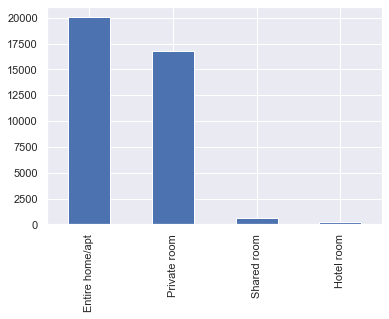

In [87]:
print(df_dummy['room_type'].value_counts())
df_dummy['room_type'].value_counts().plot(kind='bar')
plt.show()

# Entire home/apt type rooms are higher in number than other types

Private room       4917
Entire home/apt    4853
Hotel room          175
Shared room         175
Name: room_type, dtype: int64


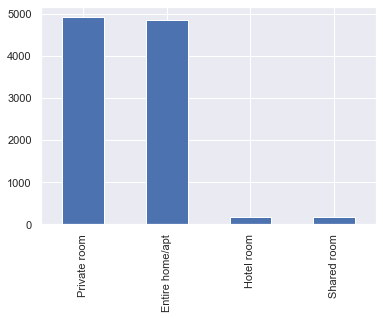

In [88]:
print(df_dummy[df_dummy['instant_bookable']=='t']['room_type'].value_counts())
df_dummy[df_dummy['instant_bookable']=='t']['room_type'].value_counts().plot(kind='bar')
plt.show()

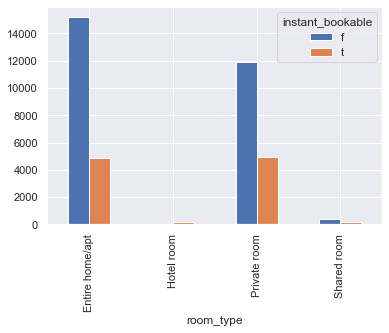

instant_bookable,f,t
room_type,,
Entire home/apt,15183,4853
Hotel room,52,175
Private room,11907,4917
Shared room,401,175


In [89]:
pd.crosstab(df_dummy['room_type'],df_dummy['instant_bookable']).plot(kind='bar')
plt.show()
pd.crosstab(df_dummy['room_type'],df_dummy['instant_bookable'])

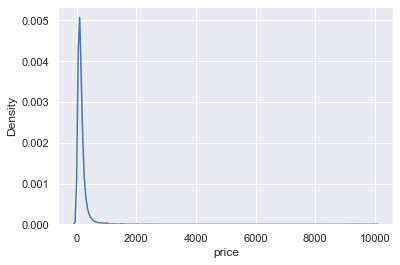

In [90]:
sns.kdeplot(df_dummy['price'])
plt.show()

1.0                   17021
within an hour        10715
within a few hours     5210
within a day           2821
a few days or more     1896
Name: host_response_time, dtype: int64


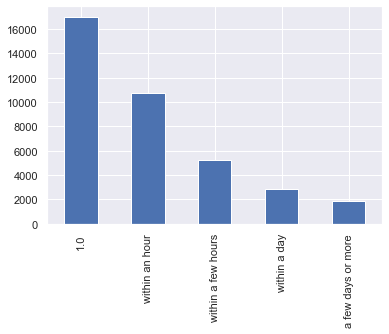

In [91]:
print(df_dummy['host_response_time'].value_counts())
df_dummy['host_response_time'].value_counts().plot(kind='bar')
plt.show()


## Around 28% of hosts respond within an hour

f    30313
t     7350
Name: host_is_superhost, dtype: int64


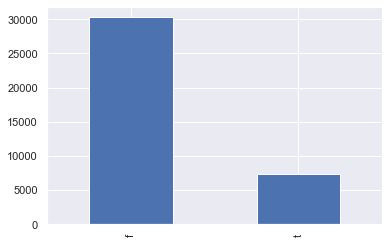

In [92]:
print(df_dummy['host_is_superhost'].value_counts())
df_dummy['host_is_superhost'].value_counts().plot(kind='bar')
plt.show()

## 80% hosts are not superhosts 

In [93]:
df_dummy['number_of_reviews'].nunique()

424

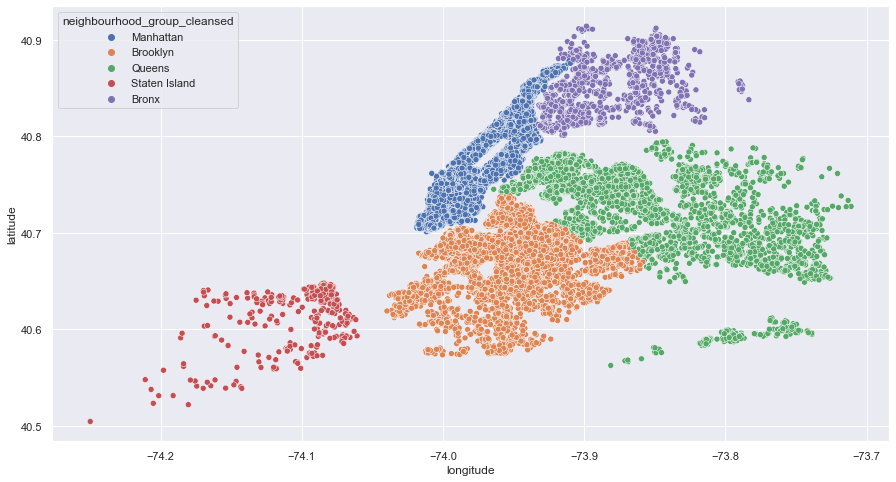

In [94]:
plt.figure(figsize=(15,8))
sns.scatterplot(df_dummy['longitude'],df_dummy['latitude'],hue=df_dummy['neighbourhood_group_cleansed'])
plt.show()

In [95]:
df_dummy.nunique()

host_response_time                                  5
host_response_rate(in %)                           84
host_acceptance_rate(in %)                        101
host_is_superhost                                   2
host_neighbourhood                                479
host_listings_count                                89
host_total_listings_count                          89
neighbourhood                                     209
neighbourhood_cleansed                            222
neighbourhood_group_cleansed                        5
latitude                                        17568
longitude                                       14318
property_type                                      79
room_type                                           4
accommodates                                       17
bathrooms_text                                     31
bedrooms                                           13
beds                                               20
amenities                   

In [96]:
df_dummy.groupby('room_type')[['accommodates','bathrooms_text','bedrooms','beds']].max()

,accommodates,bedrooms,beds
room_type,,,
Entire home/apt,16,13.00,24.00
Hotel room,8,4.00,4.00
Private room,16,11.00,21.00
Shared room,16,1.00,12.00


f    27543
t    10120
Name: instant_bookable, dtype: int64


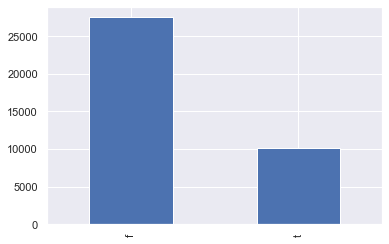

In [97]:
print(df_dummy['instant_bookable'].value_counts())
df_dummy['instant_bookable'].value_counts().plot(kind='bar')
plt.show()

# Only 27% listings can be booked instantly

In [98]:
df_dummy.select_dtypes(include='object').nunique()

host_response_time                  5
host_is_superhost                   2
host_neighbourhood                479
neighbourhood                     209
neighbourhood_cleansed            222
neighbourhood_group_cleansed        5
property_type                      79
room_type                           4
bathrooms_text                     31
amenities                       31740
has_availability                    2
instant_bookable                    2
dtype: int64

t    35531
f     2132
Name: has_availability, dtype: int64


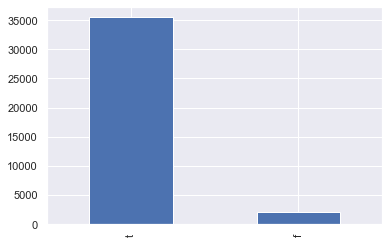

In [99]:
print(df_dummy['has_availability'].value_counts())
df_dummy['has_availability'].value_counts().plot(kind='bar')
plt.show()